In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
dataset = './keypoint.csv'
NUM_CLASSES = 28
RANDOM_SEED = 42

In [5]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

In [6]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [7]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 28)                308       
                                                                 
Total params: 1,378
Trainable params: 1,378
Non-trainable params: 0
_________________________________________________________________


In [9]:
test_size = X_train.shape[0]
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
history=model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test)
)

Epoch 1/1000
317/317 [==============================] - 3s 4ms/step - loss: 2.7985 - accuracy: 0.1474 - val_loss: 1.9945 - val_accuracy: 0.3961
Epoch 2/1000
317/317 [==============================] - 1s 3ms/step - loss: 1.9989 - accuracy: 0.3135 - val_loss: 1.4528 - val_accuracy: 0.5760
Epoch 3/1000
317/317 [==============================] - 1s 3ms/step - loss: 1.7301 - accuracy: 0.3895 - val_loss: 1.2251 - val_accuracy: 0.6633
Epoch 4/1000
317/317 [==============================] - 1s 3ms/step - loss: 1.6074 - accuracy: 0.4280 - val_loss: 1.0963 - val_accuracy: 0.7257
Epoch 5/1000
317/317 [==============================] - 1s 3ms/step - loss: 1.5253 - accuracy: 0.4534 - val_loss: 1.0099 - val_accuracy: 0.7475
Epoch 6/1000
317/317 [==============================] - 1s 3ms/step - loss: 1.4612 - accuracy: 0.4793 - val_loss: 0.9434 - val_accuracy: 0.7749
Epoch 7/1000
317/317 [==============================] - 1s 3ms/step - loss: 1.4144 - accuracy: 0.4962 - val_loss: 0.8918 - val_accuracy:

In [11]:
model.save("./model10.hdf5")

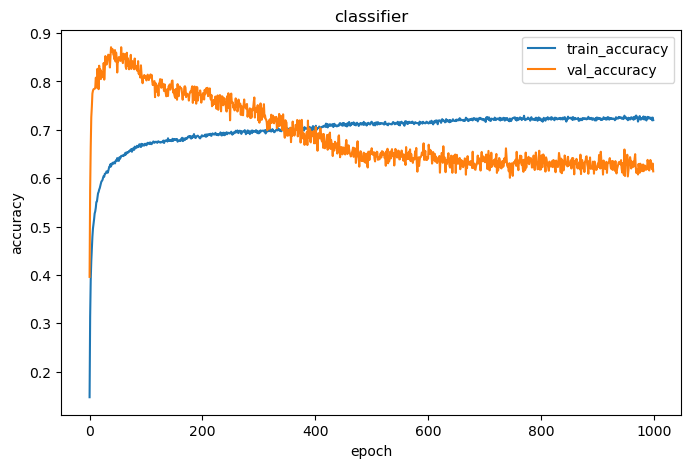

: 

In [12]:
plt.figure(figsize=(8,5))

plt.plot(history.history['accuracy'], label='train_accuracy',)
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.title("classifier")

plt.show()